### <center>Implementing the Perceptron Algorithm in Python from | Scratch</center>

#### <center>0. Perceptron algorithm overview </center>


![title](dd.png)

####  <center>1. Import the lib's</center>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### <center>2. Import & plot the dataset</center>

![title](aa.png)


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

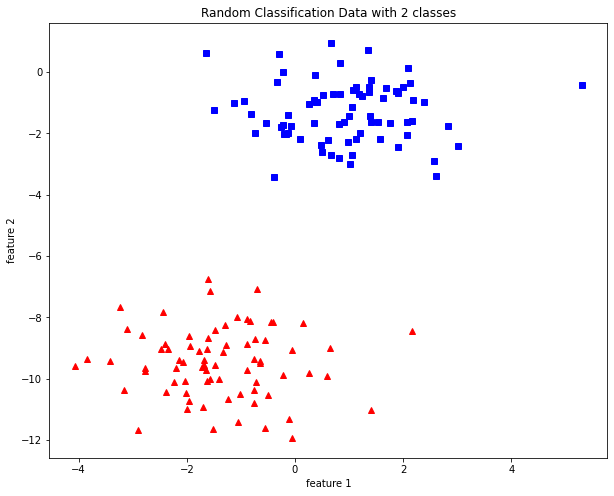

In [5]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))


plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

#### <center> 3. Algorithm from scratch | Understand and implement</center>

#### 1. There are two classes, red and green, and we want to separate them by drawing a straight line between them. 

#### 2. Or, more formally, we want to learn a set of parameters theta to find an optimal hyperplane(straight line for our data) that separates the two classes.

#### 3. For the Perceptron algorithm, we apply a different function over theta.X , which is the Unit Step Function, which is defined as 

![title](bb.png)

#### where,

![title](a.png)

#### 1. This function says that if the output(theta.X) is greater than or equal to zero, then the model will classify 1(red for example)

#### 2. if the output is less than zero, the model will classify as 0(green for example).

#### 3. And that is how the perception algorithm classifies.

#### <center>3.0 Let’s look at the Unit Step Function graphically </center>

![title](g.jpg)

#### We can see for z≥0, g(z) = 1 and for z<0, g(z) = 0.


#### <center>3.1 Let's code the unit step function </center>

In [7]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

#### <center> 3.2 Perceptron as a Neural Net </center>

![title](h.png)

#### 1. We can visually understand the Perceptron by looking at the above image. For every training example, we first take the dot product of input features and parameters, theta. 

#### 2. Then, we apply the Unit Step Function to make the prediction(y_hat).

#### 3. And if the prediction is wrong or in other words the model has misclassified that example, we make the update for the parameters theta. 


#### 4. We don’t update when the prediction is correct (or the same as the true/target value y).

#### 5. Let’s see what the update rule is.

![title](i.png)

#### <center>3.3 Define a function for perceptron </center>

In [10]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

#### <center>3.4 Plotting Decision Boundary</center>

#### y=1 when y_hat ≥ 0
#### y=0 when y_hat < 0

In [12]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

#### <center>3.5 Training and Plotting</center>

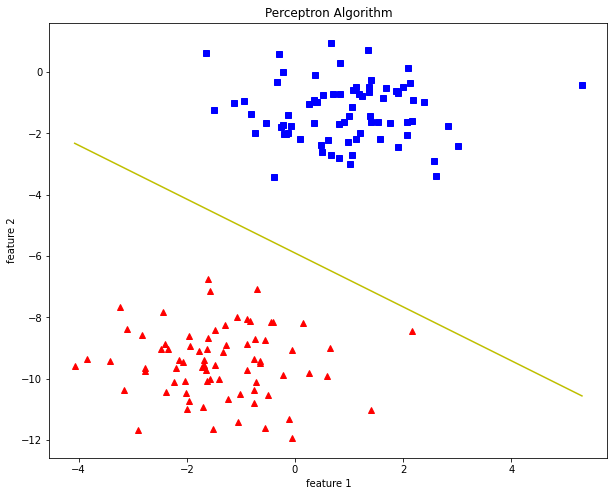

In [13]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

#### <center>4. Summary </center>

#### Note: 

#### 1, We can see from the above decision boundary graph that we are able to separate the green and blue classes perfectly. 

#### 2. Meaning, We get an accuracy of 100%.

#### <center> 5. Limitations of Perceptron Algorithm</center>


#### 1. It is only a linear classifier, can never separate data that are not linearly separable.
#### 2. The algorithm is used only for Binary Classification problems.